In [1]:
#Loading Packages
import gym
import torch


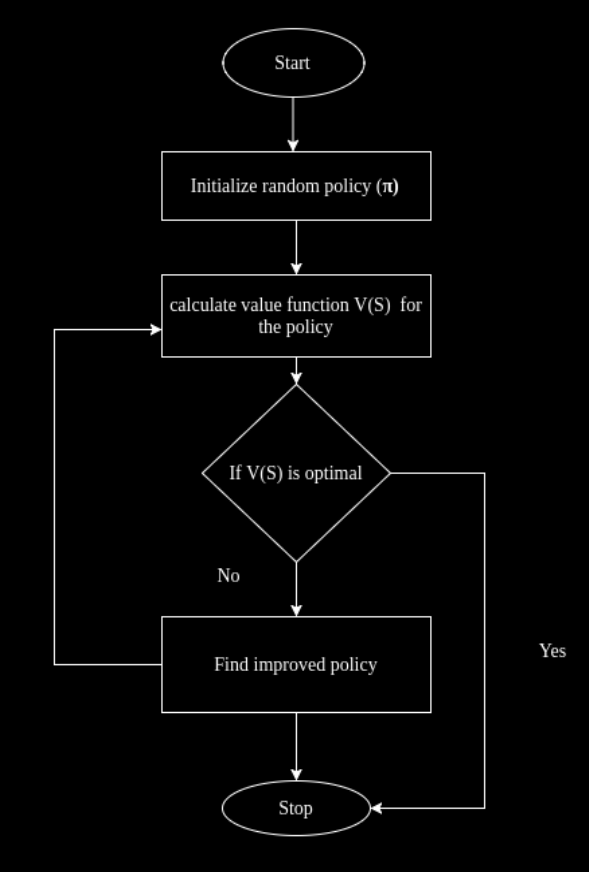

# STEP 1: Policy Evaluation

In [43]:
def policy_evaluation(env,policy,gamma,threshold):
    #1.Calculate the Value function with the given policy
    number_states=env.observation_space.n
    #2.Just as in the Value Iteration we start by evaluating a random Value Function and this time a Random Policy Function
    V=torch.zeros(number_states)
    #3.This while loop allows me to update the Value function V=(0,0,0,0,0,0,0,0,0,0,0,0,0,0)
    while True:
    #4.Create a temporary Value Function that update     
        V_temp=torch.zeros(number_states)
    #5.Because we are only using the Values of the policy we only new V[Q(0,0),Q(1,0),Q(2,0).......Q(15,0)] , in this example I am asumming that my policy is simply Policy=[0,0,0,0,0,0,0,0]
    # Basically I take action 0 for all states
        for state in range(number_states):
            policy_action=policy[state].item()
    #6.Calculates Q(0,0)== Prob(s=0,s'=0,a=0)*(Reward_New_state[s'=0] + gamma* Value_State_new_state[s'=0]) + Prob(s=0,s'=1,a=0)*(Reward_New_state[s'=1] + gamma* Value_State_new_state[s'=1])+ Prob(s=0,s'=4,a=0)*(Reward_New_state[s'=4] + gamma* Value_State_new_state[s'=4])   
    #7.Then it calculates Q(1,0) , Q(2,0)...... Q(15,0)
            for trans_prob,new_state,reward,_ in env.P[state][policy_action]:
    #8.I am replace the Q value as it goes on every state    
                V_temp[state]+= trans_prob*(reward +gamma*V[new_state])
    #9.We calculate the difference between the actual value and the temporal value
        max_delta=torch.max(torch.abs(V-V_temp))
        V=V_temp
    #10.I stop the loop if the condition is met. 
        if max_delta<=threshold:
            break
    return V

# STEP 2: Policy Improvement

In [44]:
#Policy immprovement basically calculates the values of V for all actions given that we start on a specific on the V Values from the arbitrary Policy

def policy_improvement(env,V,gamma):
    #1.I estimate the number of states and actions in my enviroment
    number_states=env.observation_space.n
    number_actions=env.action_space.n
    #2.Create an empty policy that i can fill up later
    policy=torch.zeros(number_states)
    #3.Loop over all states and actions creating a vector v_actions= [Q(0,1),Q(0,2),Q(0,3),Q(0,4)]
    for state in range(number_states):
    #4.Create the empty vector V_action    
            v_actions=torch.zeros(number_actions)
            for action in range(number_actions):
                for trans_prob, new_state, reward, _ in env.P[state][action]:
                    v_actions[action]+=trans_prob*(reward + gamma*V[new_state])
    #5. Based on the optimized Value function estimated in STEP 1 calculate the new value for every actions and take the best value and replace it in the new policy                
            policy[state]=torch.argmax(v_actions)
    return policy    


# STEP 3: Run everything together

In [64]:
#Create number of episodes and all other cconstants
n_episodes=100
#Model Constants
gamma=0.99
threshold=0.00001

#Creating the Enviroment
env=gym.make('FrozenLake8x8-v0')
#'FrozenLake8x8-v0'

In [65]:

def policy_iteration(env,gamma,threshold):
    #1.Initialize a Random Policy to start searching
    number_states=env.observation_space.n
    number_actions=env.action_space.n
    policy=torch.randint(high=number_actions,size=(number_states,)).float()
    #2.Loop over Value functions and new policies until there is no change in policies.
    while True:
        V=policy_evaluation(env,policy,gamma,threshold)
        policy_improved=policy_improvement(env,V,gamma)
        if torch.equal(policy_improved,policy):
             return V, policy_improved
        policy=policy_improved
   

In [66]:
V, policy_optimal=policy_iteration(env,gamma,threshold)

In [62]:
V

tensor([0.5419, 0.4986, 0.4704, 0.4566, 0.5583, 0.0000, 0.3582, 0.0000, 0.5917,
        0.6430, 0.6151, 0.0000, 0.0000, 0.7417, 0.8628, 0.0000])

In [63]:
policy_optimal

tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])